# Sentiment Analysis

In [1]:
# Install the package in the current Jupyter kernel

#import sys
#!conda install --yes --prefix {sys.prefix} textblob

In [2]:
from textblob import TextBlob

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/andrea/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [4]:
# TextBlob
sentence="This class is too good to be true."
print(TextBlob(sentence).sentiment)

#Vader
sid = SentimentIntensityAnalyzer()
print(sid.polarity_scores(sentence))

Sentiment(polarity=0.5249999999999999, subjectivity=0.625)
{'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'compound': 0.6908}


In [4]:
sentence="Too late, my time has come"
print(TextBlob(sentence).sentiment)
print(sid.polarity_scores(sentence))

Sentiment(polarity=-0.3, subjectivity=0.6)
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [5]:
sentence="not good"
print(TextBlob(sentence).sentiment)
print(sid.polarity_scores(sentence))

Sentiment(polarity=-0.35, subjectivity=0.6000000000000001)
{'neg': 0.706, 'neu': 0.294, 'pos': 0.0, 'compound': -0.3412}


In [6]:
import pandas as pd

artists=['ABBA','David_Bowie','Janis_Joplin','Michael_Jackson','Queen','Rolling_Stones','The_Clash','Bob_Dylan','Elton_John','Led_Zeppelin','Pink_Floyd','Ramones','The_Beatles','The_Doors']

data = {}
for i, a in enumerate(artists):
    with open("lyrics_top50/" + a + ".txt", "r") as file:
        data[a] = file.read()
        
data_df = pd.DataFrame(data,index=[0]).transpose()
data_df.columns=['lyrics']
data_df

,lyrics
ABBA,"[Verse 1]\nI, I've been in love before\nI thou..."
David_Bowie,[Intro]\n\n[Verse 1]\nA small Jean Genie snuck...
Janis_Joplin,"[Intro]\nOh, come on, come on, come on, come o..."
Michael_Jackson,"[Verse 1]\nYour butt is mine, gonna tell you r..."
Queen,[Verse 1]\nI can dim the lights and sing you s...
Rolling_Stones,[Intro]\nWhat a drag it is getting old\n\n[Ver...
The_Clash,Stay around don't play around\nThis old town a...
Bob_Dylan,[Verse 1]\nGo away from my window\nLeave at yo...
Elton_John,[Verse 1]\nCan you hear it in the distance?\nC...
Led_Zeppelin,[Intro]\nHey\nThat's right\n\n[Verse 1]\nAsked...


In [7]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol_tb = lambda x: TextBlob(x).sentiment.polarity
sub_tb = lambda x: TextBlob(x).sentiment.subjectivity
pos_nltk = lambda x: sid.polarity_scores(x)['pos']
neu_nltk = lambda x: sid.polarity_scores(x)['neu']
comp_nltk = lambda x: sid.polarity_scores(x)['compound']

In [8]:
data_df['polarity_tb'] = data_df['lyrics'].apply(pol_tb)
data_df['subjectivity_tb'] = data_df['lyrics'].apply(sub_tb)
data_df['pos_nltk'] = data_df['lyrics'].apply(pos_nltk)
data_df['neu_nltk'] = data_df['lyrics'].apply(neu_nltk)
data_df['comp_nltk'] = data_df['lyrics'].apply(comp_nltk)

data_df

,lyrics,polarity_tb,subjectivity_tb,pos_nltk,neu_nltk,comp_nltk
ABBA,"[Verse 1]\nI, I've been in love before\nI thou...",0.115758,0.514527,0.186,0.724,1.0000
David_Bowie,[Intro]\n\n[Verse 1]\nA small Jean Genie snuck...,0.073265,0.474530,0.165,0.725,1.0000
Janis_Joplin,"[Intro]\nOh, come on, come on, come on, come o...",0.216069,0.516952,0.201,0.675,0.9999
Michael_Jackson,"[Verse 1]\nYour butt is mine, gonna tell you r...",0.128611,0.509167,0.161,0.725,1.0000
Queen,[Verse 1]\nI can dim the lights and sing you s...,0.134477,0.540202,0.209,0.692,1.0000
Rolling_Stones,[Intro]\nWhat a drag it is getting old\n\n[Ver...,0.044148,0.514998,0.162,0.719,0.9999
The_Clash,Stay around don't play around\nThis old town a...,0.053961,0.437761,0.137,0.738,0.9993
Bob_Dylan,[Verse 1]\nGo away from my window\nLeave at yo...,0.055089,0.468441,0.136,0.757,1.0000
Elton_John,[Verse 1]\nCan you hear it in the distance?\nC...,0.110339,0.486626,0.165,0.739,1.0000
Led_Zeppelin,[Intro]\nHey\nThat's right\n\n[Verse 1]\nAsked...,0.153027,0.518535,0.199,0.714,1.0000


In [9]:
data_df.index

Index(['ABBA', 'David_Bowie', 'Janis_Joplin', 'Michael_Jackson', 'Queen',
       'Rolling_Stones', 'The_Clash', 'Bob_Dylan', 'Elton_John',
       'Led_Zeppelin', 'Pink_Floyd', 'Ramones', 'The_Beatles', 'The_Doors'],
      dtype='object')

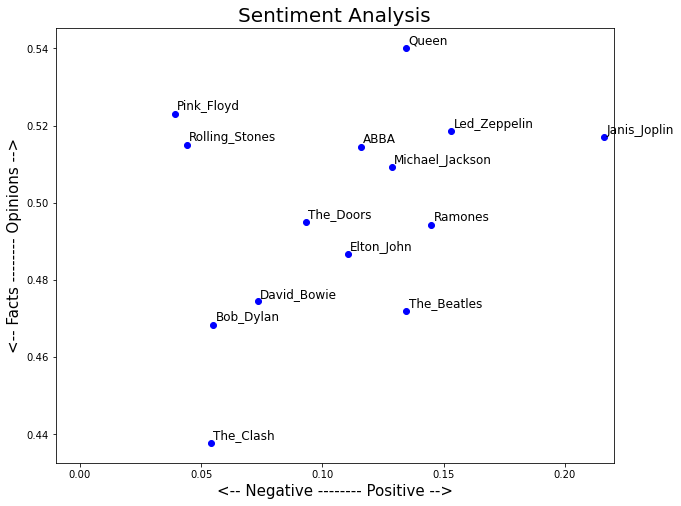

In [10]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, artist in enumerate(data_df.index):
    x = data_df.polarity_tb.loc[artist]
    y = data_df.subjectivity_tb.loc[artist]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data_df.index[index], fontsize=12)
    plt.xlim(-.01, .22) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

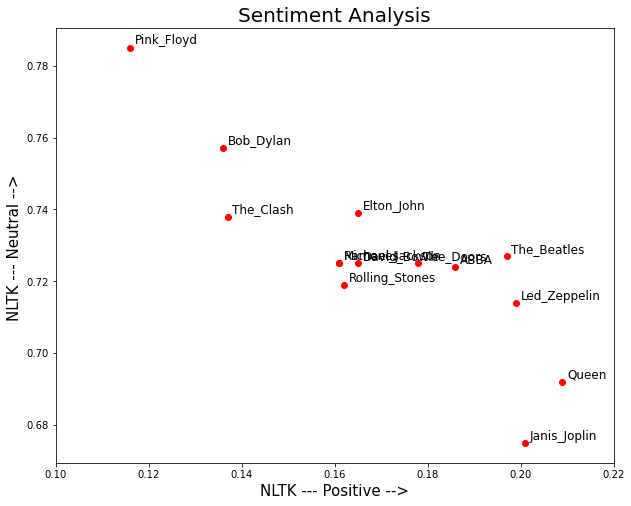

In [11]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, artist in enumerate(data_df.index):
    x = data_df.pos_nltk.loc[artist]
    y = data_df.neu_nltk.loc[artist]
    plt.scatter(x, y, color='red')
    plt.text(x+.001, y+.001, data_df.index[index], fontsize=12)
    plt.xlim(.1, .22) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('NLTK --- Positive -->', fontsize=15)
plt.ylabel('NLTK --- Neutral --> ', fontsize=15)

plt.show()

In [12]:
df_airline = pd.read_csv('airline-tweets.csv')
df_airline.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [13]:
df_airline[['airline_sentiment','airline_sentiment_confidence','text']]

,airline_sentiment,airline_sentiment_confidence,text
0,neutral,1.0000,@VirginAmerica What @dhepburn said.
1,positive,0.3486,@VirginAmerica plus you've added commercials t...
2,neutral,0.6837,@VirginAmerica I didn't today... Must mean I n...
3,negative,1.0000,@VirginAmerica it's really aggressive to blast...
4,negative,1.0000,@VirginAmerica and it's a really big bad thing...
...,...,...,...
14635,positive,0.3487,@AmericanAir thank you we got on a different f...
14636,negative,1.0000,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,1.0000,@AmericanAir Please bring American Airlines to...
14638,negative,1.0000,"@AmericanAir you have my money, you change my ..."


In [14]:
df_airline['comp_nltk'] = df_airline['text'].apply(comp_nltk)


In [15]:
df_airline[['airline_sentiment','airline_sentiment_confidence','text','comp_nltk']]

,airline_sentiment,airline_sentiment_confidence,text,comp_nltk
0,neutral,1.0000,@VirginAmerica What @dhepburn said.,0.0000
1,positive,0.3486,@VirginAmerica plus you've added commercials t...,0.0000
2,neutral,0.6837,@VirginAmerica I didn't today... Must mean I n...,0.0000
3,negative,1.0000,@VirginAmerica it's really aggressive to blast...,-0.5984
4,negative,1.0000,@VirginAmerica and it's a really big bad thing...,-0.5829
...,...,...,...,...
14635,positive,0.3487,@AmericanAir thank you we got on a different f...,0.3612
14636,negative,1.0000,@AmericanAir leaving over 20 minutes Late Flig...,-0.7906
14637,neutral,1.0000,@AmericanAir Please bring American Airlines to...,0.3182
14638,negative,1.0000,"@AmericanAir you have my money, you change my ...",0.5027



 - positive sentiment: compound score >= 0.05
 - neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
 - negative sentiment: compound score <= -0.05


In [16]:
df_airline['vader']=df_airline['comp_nltk'].apply(lambda x: "positive" if (x>0.05) else ("negative" if (x<-0.05)  else "neutral"))


In [17]:
from sklearn.metrics import confusion_matrix

confusion_matrix(df_airline.airline_sentiment, df_airline.vader, labels=['negative', "neutral", 'positive'])

array([[4563, 1905, 2710],
       [ 431, 1325, 1343],
       [  89,  215, 2059]])